Image Segmentation with Python and Unsupervised Learning
========================================================

![image](images/butterfly.jpg)

Import libraries.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Load image from file and display it.

In [5]:
img = cv2.imread("images/butterfly.jpg")
print(type(img))
print(img.shape)
print(img[25,10]) #display cell colors on this row/col (pixel colors)

<class 'numpy.ndarray'>
(425, 640, 3)
[10 48 50]


Display image.

In [8]:
#display image loaded from a file
cv2.imshow("Beautiful Photo", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Flatten image, and display in 3-D color space.

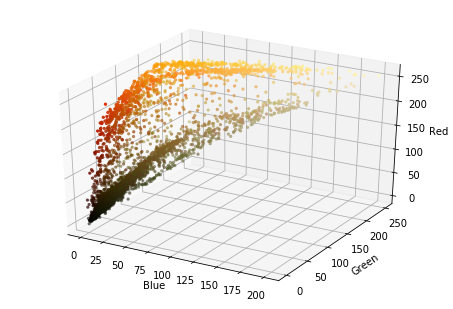

In [13]:
#examine pixel colors
flat = np.reshape(img, (-1,3))

idx = np.random.choice(flat.shape[0], 5000)
sampled_flat = flat[idx]

#create scatterplot [R,G,B]
colors = sampled_flat[:,[2,1,0]] / 255.0
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    sampled_flat[:,0],
    sampled_flat[:,1],
    sampled_flat[:,2],
    c=colors,
    marker = "."
)
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()
plt.clf()
plt.close()

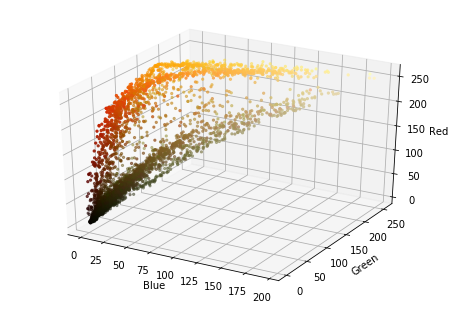

In [14]:
#examine pixel colors
flat = np.reshape(img, (-1,3))

idx = np.random.choice(flat.shape[0], 5000)
sampled_flat = flat[idx]

#create scatterplot [R,G,B]
colors = sampled_flat[:,[2,1,0]] / 255.0
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    sampled_flat[:,0],
    sampled_flat[:,1],
    sampled_flat[:,2],
    c=colors,
    marker = "."
)
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()
plt.clf()
plt.close()

K-means.

In [15]:
K = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)
ssd, bestLabels, centers = cv2.kmeans(
    data = flat.astype(np.float32),
    K = K,
    bestLabels = None,
    criteria = criteria,
    attempts = 10,
    flags = cv2.KMEANS_RANDOM_CENTERS
)

Plotting cluster centers in RGB space.

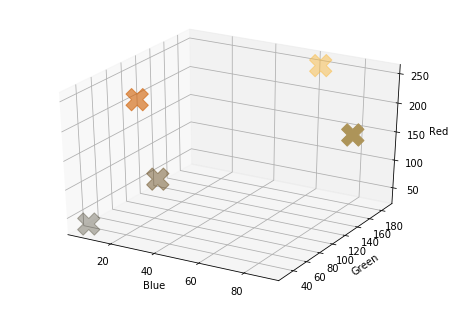

In [17]:
colors = centers[:,[2,1,0]] / 255.0
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    centers[:,0],
    centers[:,1],
    centers[:,2],
    c=colors,
    marker = "X",
    s = 500
)
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()
plt.clf()
plt.close()

Plot segmented image.

In [20]:
centers = centers.astype(np.uint8)
print(centers)
print(bestLabels)
segmented_flat = centers[bestLabels]
segmented_image = segmented_flat.reshape(img.shape)

cv2.imshow("frame", segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[  7  97 208]
 [ 89 148 173]
 [ 24  71 100]
 [ 63 186 249]
 [  6  29  36]]
[[4]
 [4]
 [4]
 ...
 [4]
 [4]
 [4]]


Elbow method.

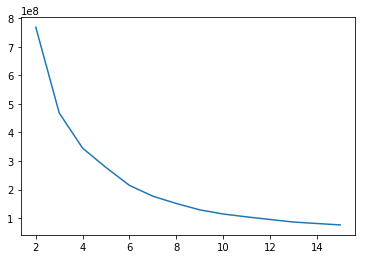

In [21]:
Ks = []
distances = []

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)

for K in range(2,16):
    ssd, bestLabels, centers = cv2.kmeans(
        data = flat.astype(np.float32),
        K = K,
        bestLabels = None,
        criteria = criteria,
        attempts = 10,
        flags = cv2.KMEANS_RANDOM_CENTERS
    )
    Ks.append(K)
    distances.append(ssd)
plt.plot(Ks, distances)
plt.show()